In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import requests # Page requests
from bs4 import BeautifulSoup as soup
# FIRST DOWNLOAD BS4 IN CMD, I USED CHAT TO HELP

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} # How we wish to appear to CL
url = 'https://charlottesville.craigslist.org/search/fua#search=2~gallery~3' # The page we want to scrape
raw = requests.get(url,headers=header) # Get page

In [4]:
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings of the kind we want

In [28]:
import re # Regular expressions

pieces = ['bookshelf', 'mirror','lamp','table','desk','chair','bed','chest','rug','cabinet','framed','sofa','dresser','bedroom','print','ottoman','clock','nightstand','stool','frame','stand']
materials = ['metal','wooden','glass','velvet','oak','canvas','fabric','cherry','bamboo','mirror','mahagony','wood','white','antique','antique','leather','rug','upholstered','marble']

data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get brand from the title string:
    words = title.split()
    hits = [word for word in words if word in pieces] # Find pieces in the title
    if len(hits) == 0:
        piece = 'missing'
    else:
        piece = hits[0]
    hits2 = [word for word in words if word in materials]
    if len(hits2) == 0:
        material = 'missing'
    else:
        material = hits2[0]
    #
    data.append({'title':title,'price':price,'link':link,'piece':piece,'material':material})

In [29]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
print(df.shape)
df.to_csv('./src/craigslist_cville_furniture.csv') # Save data in case of a disaster
df.head()

(355, 5)


,title,price,link,piece,material
0,vintage handmade solid wooden heavy bookshelf,80,https://charlottesville.craigslist.org/fuo/d/g...,bookshelf,wooden
1,vintage handmade solid wooden storage chest,180,https://charlottesville.craigslist.org/fuo/d/g...,chest,wooden
2,vanity metal mirrored table,100,https://charlottesville.craigslist.org/fuo/d/c...,table,metal
3,ikea wooden storage cabinet (2),60,https://charlottesville.craigslist.org/fuo/d/g...,cabinet,wooden
4,ethan allan charter oak jacobean corner cabine...,800,https://charlottesville.craigslist.org/fuo/d/b...,cabinet,oak


count     355.000000
mean      197.264789
std       466.371960
min         0.000000
25%        25.000000
50%        50.000000
75%       162.500000
max      4000.000000
Name: price, dtype: float64


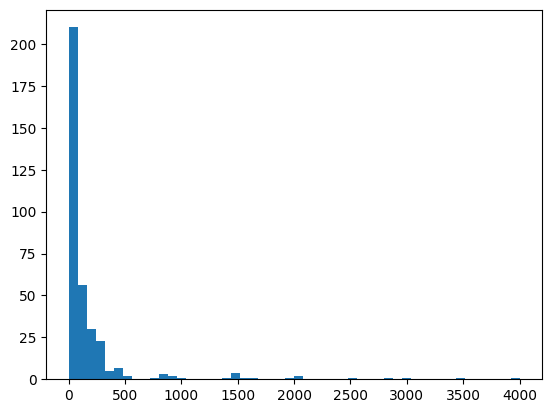

In [30]:
print(df['price'].describe())
df['price'].hist(grid=False,bins=50)
plt.show()

In [31]:
# Price by piece:
df.loc[:,['price','piece']].groupby('piece').describe()

price                                                             \
            count         mean         std     min      25%     50%      75%   
piece                                                                          
bed           8.0   119.875000  125.624654     0.0    13.50    67.5   250.00   
bedroom       3.0  1833.333333  763.762616  1000.0  1500.00  2000.0  2250.00   
bookshelf     3.0   118.333333  117.295922    25.0    52.50    80.0   165.00   
cabinet      10.0   409.400000  494.900933    30.0    63.75   200.0   674.75   
chair        29.0    88.965517  100.404355     5.0    20.00    40.0   150.00   
chest         6.0    92.500000   51.744565    50.0    52.50    75.0   116.25   
clock         1.0    50.000000         NaN    50.0    50.00    50.0    50.00   
desk         18.0   113.000000  111.046890    10.0    26.25    67.5   187.50   
dresser       3.0   183.333333  115.470054    50.0   150.00   250.0   250.00   
frame         6.0    55.000000   71.203932    20.0    22.50    30.0    30.00   
framed        9.0   311.666667  641.239035    30.0    40.00    50.0   150.00   
lamp          9.0    30.222222   24.707174     5.0    10.00    20.0    45.00   
mirror        2.0    36.000000    8.485281    30.0    33.00    36.0    39.00   
missing     152.0   231.328947  570.981516     1.0    20.00    50.0   175.00   
nightstand    1.0    25.000000         NaN    25.0    25.00    25.0    25.00   
ottoman       3.0    23.333333    2.886751    20.0    22.50    25.0    25.00   
print         3.0    81.666667   65.255907    20.0    47.50    75.0   112.50   
rug          15.0   163.333333   87.803894    50.0   100.00   180.0   200.00   
sofa          7.0   439.285714  553.183428    25.0   112.50   150.0   587.50   
stand         9.0    48.888889   34.711109    20.0    20.00    30.0    75.00   
stool         2.0    82.500000   95.459415    15.0    48.75    82.5   116.25   
table        56.0   147.160714  373.204296    10.0    33.75    70.0   142.50   

                    
               max  
piece               
bed          300.0  
bedroom     2500.0  
bookshelf    250.0  
cabinet     1500.0  
chair        450.0  
chest        180.0  
clock         50.0  
desk         400.0  
dresser      250.0  
frame        200.0  
framed      2000.0  
lamp          75.0  
mirror        42.0  
missing     4000.0  
nightstand    25.0  
ottoman       25.0  
print        150.0  
rug          350.0  
sofa        1500.0  
stand        120.0  
stool        150.0  
table       2800.0

In [32]:
# price by material:
df.loc[:,['price','material']].groupby('material').describe()

price                                                           \
             count         mean          std    min     25%    50%      75%   
material                                                                      
antique       15.0   372.200000   736.808969   30.0  102.00  150.0   312.50   
bamboo         3.0   100.000000   130.288142   15.0   25.00   35.0   142.50   
canvas         1.0   175.000000          NaN  175.0  175.00  175.0   175.00   
cherry         2.0   102.500000   130.814755   10.0   56.25  102.5   148.75   
fabric         2.0   775.000000  1025.304833   50.0  412.50  775.0  1137.50   
glass         12.0   195.666667   413.482622    5.0   46.75   70.0   128.50   
leather        3.0  1050.000000   396.862697  750.0  825.00  900.0  1200.00   
mahagony       1.0    75.000000          NaN   75.0   75.00   75.0    75.00   
marble         3.0   138.333333    96.996564   75.0   82.50   90.0   170.00   
metal          8.0    38.750000    31.481287   10.0   20.00   27.5    41.25   
mirror         2.0    36.000000     8.485281   30.0   33.00   36.0    39.00   
missing      234.0   203.645299   510.809824    0.0   20.00   50.0   150.00   
oak           11.0   188.818182   230.685855   20.0   38.50   85.0   262.50   
rug           15.0   163.333333    87.803894   50.0  100.00  180.0   200.00   
upholstered    3.0   258.333333   166.458203  150.0  162.50  175.0   312.50   
white          9.0    38.111111    42.642246   15.0   20.00   25.0    30.00   
wood          21.0    73.714286    93.456483   15.0   20.00   30.0    75.00   
wooden        10.0   100.000000    91.833182   20.0   27.50   67.5   155.00   

                     
                max  
material             
antique      2999.0  
bamboo        250.0  
canvas        175.0  
cherry        195.0  
fabric       1500.0  
glass        1500.0  
leather      1500.0  
mahagony       75.0  
marble        250.0  
metal         100.0  
mirror         42.0  
missing      4000.0  
oak           800.0  
rug           350.0  
upholstered   450.0  
white         150.0  
wood          325.0  
wooden        250.0

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'wooden'),
  Text(1, 0, 'metal'),
  Text(2, 0, 'oak'),
  Text(3, 0, 'rug'),
  Text(4, 0, 'missing'),
  Text(5, 0, 'glass'),
  Text(6, 0, 'leather'),
  Text(7, 0, 'marble'),
  Text(8, 0, 'fabric'),
  Text(9, 0, 'canvas'),
  Text(10, 0, 'upholstered'),
  Text(11, 0, 'wood'),
  Text(12, 0, 'antique'),
  Text(13, 0, 'mirror'),
  Text(14, 0, 'bamboo'),
  Text(15, 0, 'white'),
  Text(16, 0, 'cherry'),
  Text(17, 0, 'mahagony')])

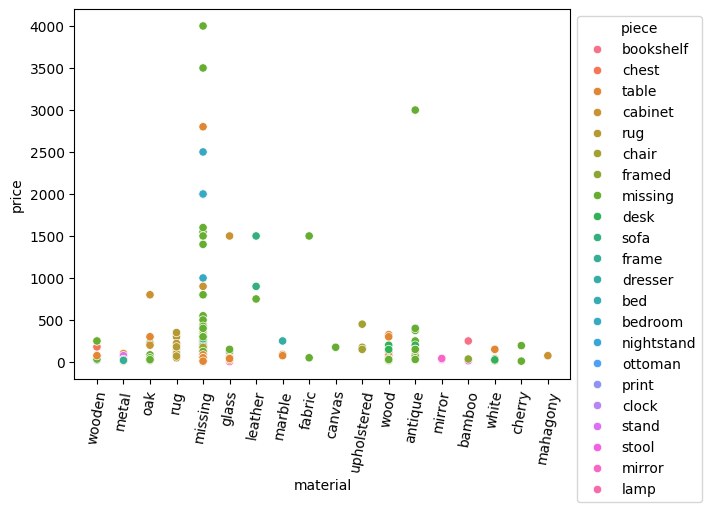

In [37]:
ax = sns.scatterplot(data=df, x='material', y='price',hue='piece')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=80)

In [35]:
# Story:
# Looking at the scatterplot above, furniture that is in the "missing" category appears to have the highest prices. There were many listings that did not have materials listed in their titles, accounting for the wide range of price within this category as seen in the chart above. leather is more expensive, antique furniture shows some mroe expensive outliers, as does glass and fabric. 
# Looking at the mean prices by material, leather is the highest by far at $1050. Fabric and antiques are also slighlty more expensive ($775 and $372 respectively). 
# looking at price by type of furniture (piece), bedroom sets show very highest mean prices ($1833.33).